In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import scipy.stats as st
import seaborn as sns
import time
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<h1><center> **2.1 Inverse Transform**

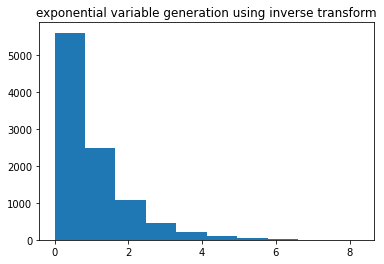

In [ ]:
#The exponential distribution has CDF: F(x)=1−e^−λx
# Inverse of F, F^−(x)=−1/λ ln(1−x)
#using rvs X which has uniform distibution
#np.random.rand() produce uniform random numbers in (0,1).

def inverse_exp_cdf(lmbda=1.0):
    return (-1 / lmbda)*np.log(1 - np.random.rand())

plt.hist([inverse_exp_cdf() for i in range(10000)])
plt.title('exponential variable generation using inverse transform')
None

<h1><center> **2.2 Trasformation Methods**




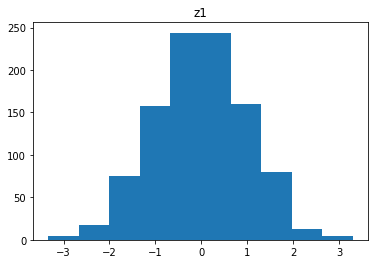

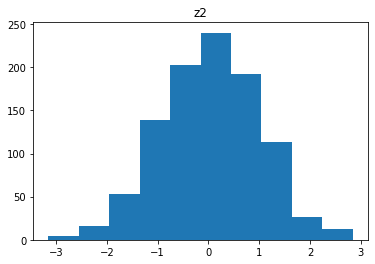

In [3]:
#Normal Variable Generation
#Box-Muller Transformation

# transformation function
def normal_generation(u1,u2):
    z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    return z1,z2

# uniformly distributed values between 0 and 1
u1 = np.random.rand(1000)
u2 = np.random.rand(1000)

# run the transformation
z1,z2 = normal_generation(u1,u2)



plt.figure()
plt.title('z1')
plt.hist(z1)
plt.show()

plt.figure()
plt.title('z2')
plt.hist(z2)
plt.show()


In [5]:
#poisson generation

#p=1, N=0, c=e^-lamda
#1. Repeat :
#N=N+1
#generate U,
#update p= pU, until p<c.
#2. Take X= N-1.

def Poisson(lambdaValue):
    elambda = np.exp(-1*lambdaValue)
    p = 1
    N = 0
    while (p >= elambda):
        p *= np.random.rand()
        X = N
        N += 1
    return X


#I choose lambda as 5.
result = [[ Poisson(5) for x in range(1, 1000)]]
    


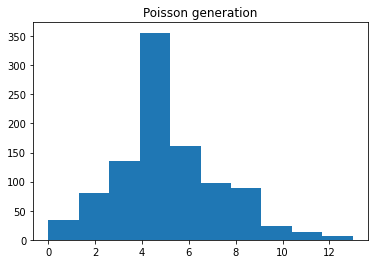

In [6]:
plt.figure()
plt.title('Poisson generation')
plt.hist(result)
plt.show()

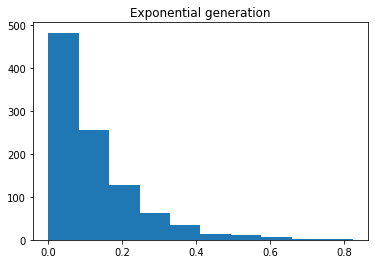

In [ ]:
#Exponential generation

# 1. Generate U.
# 2. Take x = − log(U)/λ.


def exp(λ):
    ue = np.random.rand()
    exp = - np.log(ue) / λ
    return exp

result_exp = [[exp(8) for x in range(1, 1000)]]


plt.figure()
plt.title('Exponential generation')
plt.hist(result_exp)
plt.show()

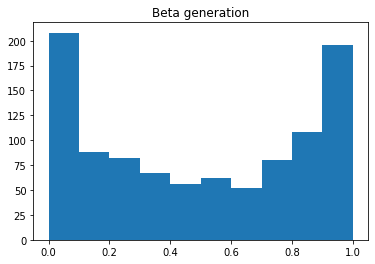

In [ ]:
#beta generation

def beta_(α, β):
    u = np.random.rand()
    v = np.random.rand()
    if u ** (1 / α) + v ** (1 / β) <= 1:
        result = (u ** (1 / α)) / (u ** (1 / α) + v ** (1 / β))
        return result
    else:
        return beta_(α, β)
    
result_beta = [[beta_(0.5, 0.5) for x in range(1, 1000)]]

plt.figure()
plt.title('Beta generation')
plt.hist(result_beta)
plt.show()

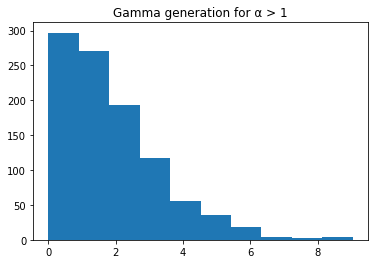

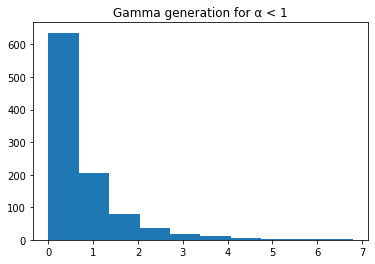

In [ ]:
#gamma generation

#The simulation methods differ according to the value of α (notice that the scale factor β can be assumed to be 1)
#When α > 1, the Cheng and Feast algorithm

def gamma_1(α):
    c1 = α - 1
    c2 = (α - (1 / (6*α))) / c1
    c3 = 2 / c1
    c4 = 1 + c3
    c5 = 1 / np.sqrt(α)
    u1 = np.random.rand()
    u2 = np.random.rand()
    if α > 2.5:
        u1 = u2 + c5 * (1 - 1.86 * u1) 
        while  0 < u1 < 1:
            break
    W = c2 * u2 / u1
    if c3 * u1 + W + W - 1 <= c4 or c3 * np.log(u1) - np.log(W) + W <= 1:
          return c1 * W
    else:
          return gamma_1(α)

result_gamma_1 = [[gamma_1(2) for x in range(1, 1000)]]


plt.figure()
plt.title('Gamma generation for α > 1')
plt.hist(result_gamma_1)
plt.show()


#When α < 1,

def gamma_2(α):
    u = np.random.rand()
    y = gamma_1(α + 1)
    result = y * u ** (1 / α)
    return result

result_gamma_2 = [[gamma_2(0.75) for x in range(1, 1000)]]


plt.figure()
plt.title('Gamma generation for α < 1')
plt.hist(result_gamma_2)
plt.show()

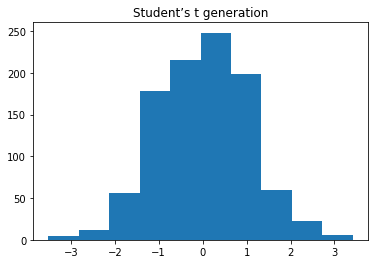

In [ ]:
#student's t generation

def students_t(w):
    un1 = np.random.rand()
    un2 = np.random.rand()
    if un1 < 0.5:
        X = 1 / (4 * un1 - 1)
        V = un2 / un2**2
    else:
        X = 4 * un1 - 3
        V = un2
    if V < 1 - (np.linalg.norm(X) / 2) or V < 1 + (X**2 / w)**((-w-1)/2):
        return X
    else:
        return students_t(w)
        
        

result_X = [[students_t(5) for x in range(1, 1000)]]


plt.figure()
plt.title('Student’s t generation')
plt.hist(result_X)
plt.show()

<h1><center> **2.3 Accept-Reject Methods**

Algorithm:
1. Generate X ~ g, U ~ U([0,1])
2. Accept Y = X if U < f(X)/Mg(X) 
3. Return to 1 otherwise.


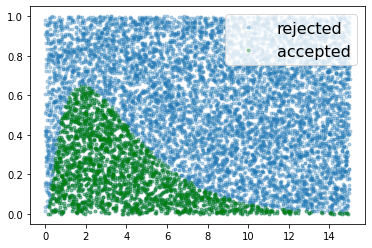

In [ ]:
x = np.linspace(0.001,15,100)
#distribution of x, g(x)
def g(x):
  return np.exp(-(x-1)**2/2./x)*(x+1)/12.
gx = g(x)
#Let M be equal to 0.3. 
M = 0.3 
uni1 = np.random.rand(10000)*15 
uni2 = np.random.rand(10000)    
idx = np.where(uni2 <= g(uni1)/M)[0] # rejection criterion
v = uni1[idx]



plt.plot(uni1,uni2,'.',label='rejected',alpha=.3)
plt.plot(uni1[idx],uni2[idx],'g.',label='accepted',alpha=.3)
plt.legend(fontsize=16)

Text(0.5, 1.0, 'Accept-reject for normal distribution')

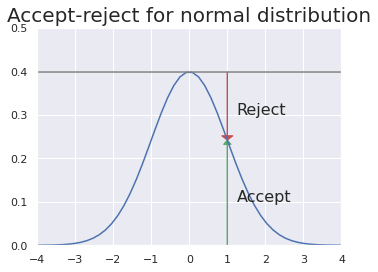

In [ ]:
x = np.linspace(-4, 4)

df = 10
#Let choose normal distribution.
dist = st.norm()
upper = dist.pdf(0)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x, dist.pdf(x))
plt.axhline(upper, color='grey')
px = 1.0
plt.arrow(px,0,0,dist.pdf(1.0)-0.01, linewidth=1, head_width=0.2, head_length=0.01, fc='g', ec='g')
plt.arrow(px,upper,0,-(upper-dist.pdf(px)-0.01), linewidth=1, head_width=0.3, head_length=0.01, fc='r', ec='r')
plt.text(px+.25, 0.3, 'Reject', fontsize=16)
plt.text(px+.25, 0.1, 'Accept', fontsize=16)
plt.axis([-4,4,0,0.5])
plt.title('Accept-reject for normal distribution', fontsize=20)


  


<h1><center> **Envelope Accept-Reject Methods**

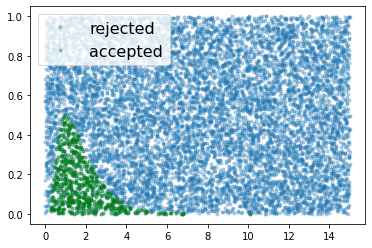

In [ ]:

#distribution of x, g_n(x)
def g_n(x):
  return np.exp(-(x-1)**2/2./x)/4.

def f_(x):
  return np.exp(-(x-1)**2/2./x)

def g_m(x):
  return np.exp((x-1)**2/2./x)

#Let M be equal to 0.5. 
M1 = 0.5 
unif1 = np.random.rand(10000)*15 
unif2 = np.random.rand(10000)    
idx_1 = np.where(unif2 <= g_n(unif1)/(g_m(unif1)*M1))[0] # rejection criterion 1
idx_2 = np.where(unif2 <= f_(unif1)/(g_m(unif1)*M1))[0] # rejection criterion 2
v_1 = unif1[idx_1]
v_2 = unif1[idx_2]


plt.plot(unif1,unif2,'.',label='rejected',alpha=.3)
plt.plot(unif1[idx_1],unif2[idx_1],'g.',label='accepted',alpha=.3)
plt.legend(fontsize=16)



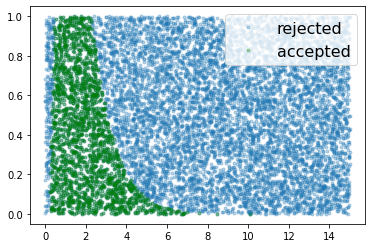

In [ ]:
plt.plot(unif1,unif2,'.',label='rejected',alpha=.3)
plt.plot(unif1[idx_2],unif2[idx_2],'g.',label='accepted',alpha=.3)
plt.legend(fontsize=16)

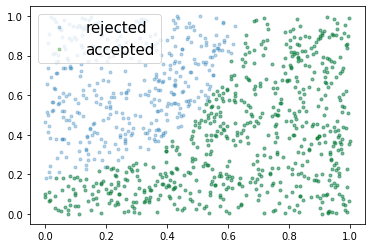

In [ ]:
#Atkinson's Poisson simulation

#let lambda be 5.
lam = 5
b = np.pi / np.sqrt(3 * lam)
a = lam * b
c = 0.767 - 3.36/lam
k = np.log(c) - lam - np.log(b)

u1_ = np.random.rand(1000)
x_ = (a - np.log(1 - u1_) / u1_) / b
while x_.any() > - 0.5:
     break

N = x_ + 0.5
u2_ = np.random.rand(1000)



idx1_ = np.where((a - b*x_ + np.log(u2_ / (1 + np.exp(a - b * x_)**2))) <= k + N * np.log(lam) - np.log(math.factorial(int(N[0])))) # rejection criterion



plt.plot(u1_,u2_,'.',label='rejected',alpha=.3)
plt.plot(u1_[idx1_],u2_[idx1_],'g.',label='accepted',alpha=.3)
plt.legend(fontsize=15)
